In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV ,StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', message='Specific Warning Message')
warnings.filterwarnings("ignore", category=ConvergenceWarning)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/statlog-landsat-satellite-data-set2/satellite.mat.csv


In [2]:
dataset = pd.read_csv("/kaggle/input/statlog-landsat-satellite-data-set2/satellite.mat.csv")

In [3]:
dataset.shape

(6435, 38)

In [4]:
dataset.head()

,ID,V0,V1,V2,V3,V4,V5,V6,V7,V8,...,V27,V28,V29,V30,V31,V32,V33,V34,V35,Y
0,0,92,115,120,94,84,102,106,79,84,...,104,88,121,128,100,84,107,113,87,0
1,1,84,102,106,79,84,102,102,83,80,...,100,84,107,113,87,84,99,104,79,0
2,2,84,102,102,83,80,102,102,79,84,...,87,84,99,104,79,84,99,104,79,0
3,3,80,102,102,79,84,94,102,79,80,...,79,84,99,104,79,84,103,104,79,0
4,4,84,94,102,79,80,94,98,76,80,...,79,84,103,104,79,79,107,109,87,0


In [5]:
X = dataset.iloc[:,0:-1]
y = dataset.iloc[:,-1]

In [6]:
ss = StandardScaler()
X = ss.fit_transform(X)

In [7]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))
samples

[(array([[-1.38940892,  1.2936597 ,  0.84810932, ..., -0.25679812,
           0.18413414,  0.02596148],
         [-1.50568645,  1.3671631 ,  0.97922558, ...,  0.88279375,
           0.84304598,  0.23590444],
         [ 0.20886891, -1.42596581, -0.7689913 , ..., -0.4759504 ,
          -0.83418416, -0.39392445],
         ...,
         [-0.84193551, -0.47042171, -0.55046419, ..., -0.69510268,
          -1.49309601, -1.28618206],
         [-0.32837638,  0.11760543,  1.06663643, ...,  1.40875923,
           1.5618589 ,  0.8132476 ],
         [-0.26108614,  0.11760543,  0.14882257, ...,  0.18150645,
          -0.17527232, -0.65635316]]),
  array([[ 0.39405166,  1.3671631 ,  0.8044039 , ...,  0.88279375,
           0.30393629,  0.02596148],
         [ 0.72027475,  1.2936597 ,  0.84810932, ...,  1.40875923,
           1.26235352,  0.60330463],
         [-0.52863214,  0.411619  ,  1.41627981, ...,  1.27726786,
           1.50195783,  0.8132476 ],
         ...,
         [-1.37756583, -1.71997938

In [8]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [9]:
def fitnessFunction(kernel, C, gamma):
    svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=1000)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    return accuracy_score(y_pred, y_test)

In [10]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.82 Best Kernel =  rbf Best Nu =  6.42 Best Epsilon =  6.87
Best Accuracy =  0.84 Best Kernel =  rbf Best Nu =  5.31 Best Epsilon =  4.88
Best Accuracy =  0.79 Best Kernel =  rbf Best Nu =  8.99 Best Epsilon =  7.71
Best Accuracy =  0.79 Best Kernel =  rbf Best Nu =  9.06 Best Epsilon =  7.57
Best Accuracy =  0.81 Best Kernel =  rbf Best Nu =  0.34 Best Epsilon =  6.27
Best Accuracy =  0.85 Best Kernel =  rbf Best Nu =  1.38 Best Epsilon =  3.47
Best Accuracy =  0.91 Best Kernel =  rbf Best Nu =  5.48 Best Epsilon =  4.11
Best Accuracy =  0.87 Best Kernel =  rbf Best Nu =  9.58 Best Epsilon =  1.82
Best Accuracy =  0.81 Best Kernel =  rbf Best Nu =  0.1 Best Epsilon =  6.21
Best Accuracy =  0.82 Best Kernel =  rbf Best Nu =  0.93 Best Epsilon =  3.65


In [11]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.82,rbf,6.42,6.87
1,2,0.84,rbf,5.31,4.88
2,3,0.79,rbf,8.99,7.71
3,4,0.79,rbf,9.06,7.57
4,5,0.81,rbf,0.34,6.27
5,6,0.85,rbf,1.38,3.47
6,7,0.91,rbf,5.48,4.11
7,8,0.87,rbf,9.58,1.82
8,9,0.81,rbf,0.10,6.21
9,10,0.82,rbf,0.93,3.65


In [12]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()], 
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 1000), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [14]:
train_sizes

array([  40,  122,  204,  286,  368,  449,  531,  613,  695,  777,  859,
        941, 1023, 1105, 1186, 1268, 1350, 1432, 1514, 1596, 1678, 1760,
       1842, 1923, 2005, 2087, 2169, 2251, 2333, 2415, 2497, 2579, 2660,
       2742, 2824, 2906, 2988, 3070, 3152, 3234, 3316, 3397, 3479, 3561,
       3643, 3725, 3807, 3889, 3971, 4053])

In [15]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

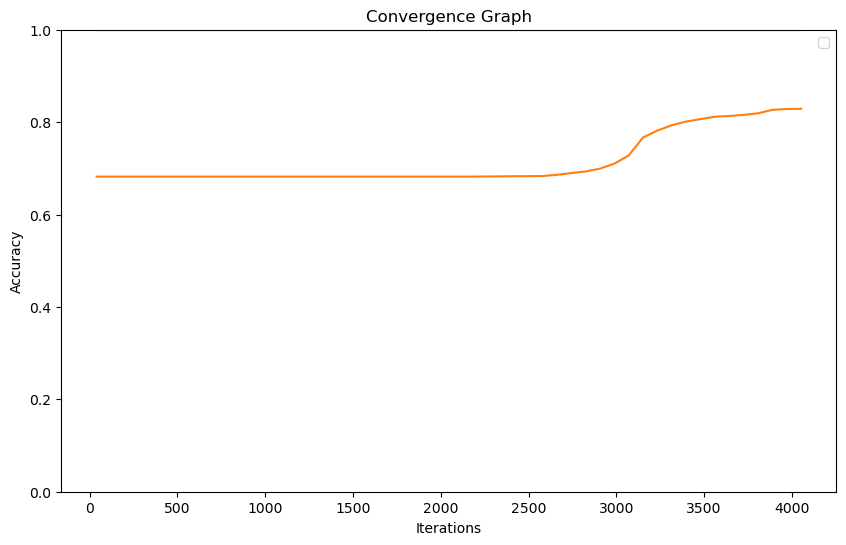

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean )
plt.plot(train_sizes, test_mean)
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.ylim([0, 1])
plt.show()
